# Managing Time Series Data - Lab

## Introduction

In the previous lesson, you learned that time series data are everywhere and working with time series data is an important skill for data scientists!

In this lab, you'll practice your previously learned techniques to import, clean, and manipulate time series data.

The lab will cover how to perform time series analysis while working with large datasets. The dataset can be memory intensive so your computer will need at least 2GB of memory to perform some of the calculations.


## Objectives

You will be able to:

- Load time series data using Pandas and perform time series indexing 
- Perform data cleaning operation on time series data 
- Change the granularity of a time series 


## Let's get started!

Import the following libraries: 

* `pandas`, using the alias `pd` 
* `pandas.tseries` 
* `matplotlib.pyplot`, using the alias `plt` 
* `statsmodels.api`, using the alias `sm`

In [1]:
import pandas as pd
from pandas import tseries
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Loading time series data
The `statsModels` library comes bundled with built-in datasets for experimentation and practice. A detailed description of these datasets can be found [here](http://www.statsmodels.org/dev/datasets/index.html). Using `statsModels`, the time series datasets can be loaded straight into memory. 

In this lab, we'll use the **Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.**, containing CO2 samples from March 1958 to December 2001. Further details on this dataset are available [here](http://www.statsmodels.org/dev/datasets/generated/co2.html).

In the following cell: 

- We loaded the `co2` dataset using the `.load()` method 
- Converted this into a pandas DataFrame 
- Renamed the columns 
- Set the `'date'` column as index 

In [2]:
# Load the 'co2' dataset from sm.datasets
data_set = sm.datasets.co2.load()

# load in the data_set into pandas data_frame
CO2 = pd.DataFrame(data=data_set['data'])
CO2.rename(columns={'index': 'date'}, inplace=True)

# set index to date column
CO2.set_index('date', inplace=True)

CO2.head()

/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/datasets/utils.py:344: FutureWarning: load will return datasets containing pandas DataFrames and Series in the Future.  To suppress this message, specify as_pandas=False
  FutureWarning)


,co2
date,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


Let's check the data type of `CO2` and also print the first 15 entries of `CO2` as our first exploratory step.

In [7]:
# Print the data type of CO2 
print(CO2['co2'].dtype)

# Print the first 15 rows of CO2
CO2.head(15)

float64


,co2
date,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
1958-05-03,316.9
1958-05-10,NaN
1958-05-17,317.5
1958-05-24,317.9


With all the required packages imported and the `CO2` dataset as a Dataframe ready to go, we can move on to indexing our data.

## Date Indexing

While working with time series data in Python, having dates (or datetimes) in the index can be very helpful, especially if they are of `DatetimeIndex` type. Further details can be found [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Timestamp.html).

Print the `.index` attribute of the `CO2` DataFrame: 

In [8]:
# Confirm that date values are used for indexing purpose in the CO2 dataset 
CO2.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', name='date', length=2284, freq=None)

The output above shows that our dataset clearly fulfills the indexing requirements. Look at the last line:


> **dtype='datetime64[ns]', length=2284, freq='W-SAT'**


* `dtype=datetime[ns]` field confirms that the index is made of timestamp objects.
* `length=2284` shows the total number of entries in our time series data. 

## Resampling

Remember that depending on the nature of analytical question, the resolution of timestamps can also be changed to other frequencies. For this dataset we can resample to monthly CO2 consumption values. This can be done by using the `.resample()` method as seen in the earlier lesson. 

* Group the data into buckets representing 1 month using `.resample()` method 
* Call the `.mean()` method on each group (i.e. get monthly average) 
* Combine the result as one row per monthly group 

In [9]:
# Group the time series into monthly buckets
CO2_monthly = CO2.resample('MS')

# Take the mean of each group 
CO2_monthly_mean = CO2_monthly.mean()

# Get the first 10 elements of resulting time series
CO2_monthly_mean.head(10)

,co2
date,
1958-03-01,316.100000
1958-04-01,317.200000
1958-05-01,317.433333
1958-06-01,NaN
1958-07-01,315.625000
1958-08-01,314.950000
1958-09-01,313.500000
1958-10-01,NaN
1958-11-01,313.425000


Looking at the index values, we can see that our time series now carries aggregated data on monthly terms, shown as `Freq: MS`. 

### Time-series Index Slicing for Data Selection

Slice our dataset to only retrieve data points that come after the year 1990.

In [11]:
# Slice the timeseries to contain data after year 1990 
after90 = CO2['1990':]
after90

,co2
date,
1990-01-06,353.4
1990-01-13,353.5
1990-01-20,353.8
1990-01-27,353.9
1990-02-03,354.1
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2


Retrieve data starting from Jan 1990 to Jan 1991: 

In [13]:
# Retrieve the data between 1st Jan 1990 to 1st Jan 1991
yr90 = CO2_monthly_mean['1990-01-01':'1991-01-01']
yr90

,co2
date,
1990-01-01,353.650
1990-02-01,354.650
1990-03-01,355.480
1990-04-01,356.175
1990-05-01,357.075
1990-06-01,356.080
1990-07-01,354.675
1990-08-01,352.900
1990-09-01,350.940


## Missing Values

Find the total number of missing values in the dataset.

In [14]:
# Find the total number of missing values in the time series
CO2.isnull().sum()

co2    59
dtype: int64

Remember that missing values can be filled in a multitude of ways. 

- Replace the missing values in `CO2_monthly_mean` with a previous valid value 
- Next, check if your attempt was successful by checking for number of missing values again 

In [15]:
# Perform backward filling of missing values
CO2_final = CO2.ffill()

# Find the total number of missing values in the time series
CO2_final.isnull().sum()

co2    0
dtype: int64

Great! Now your time series data are ready for visualization and further analysis.

## Summary

In this introductory lab, you learned how to create a time series object in Python using Pandas. You learned how to check timestamp values as the data index and you learned about basic data handling techniques for time-series data for further analysis.

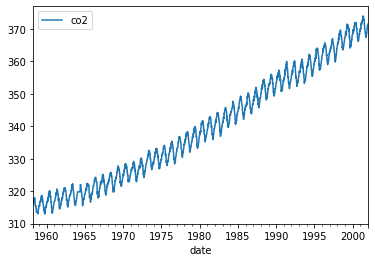

In [18]:
CO2_final.plot()